<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_6_resz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

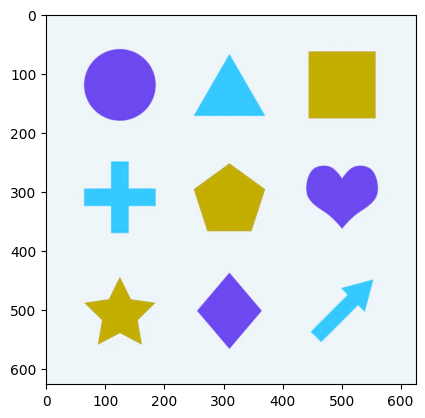

In [ ]:
src = cv.imread("/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/shapes.jpg")
plt.imshow(src)

#4 Homográfia

A homográfia egy matematikai transzformáció, amely képek közötti geometriai kapcsolatot ír le. Egyszerűen fogalmazva, a homográfia egy képről a másikra való átvitel geometriai leírása.

A homográfia a síkgeometria alapján működik, és olyan transzformációkat ír le, amelyek a síkbeli pontokat egyik képen egy másik síkbeli pontokként ábrázolják a másik képen.

A homográfia hasznos lehet például az alábbi esetekben:

Kép regisztráció: Két kép közötti geometriai kapcsolatok meghatározására, például amikor az egyik képen ugyanaz a tárgy látható egy másik perspektívából vagy eltolódva.

Panoráma összeállítás: Képek egy sorozatának összeállításához, hogy létrehozzunk egy nagyobb látószögű vagy panorámaképet.

Perspektíva korrekció: A perspektíva torzítás javítására például olyan esetekben, amikor a kamera nem vízszintes vagy nem merőleges az objektumokra.

Objektum követés: Az objektumok mozgásának követéséhez a képeken.


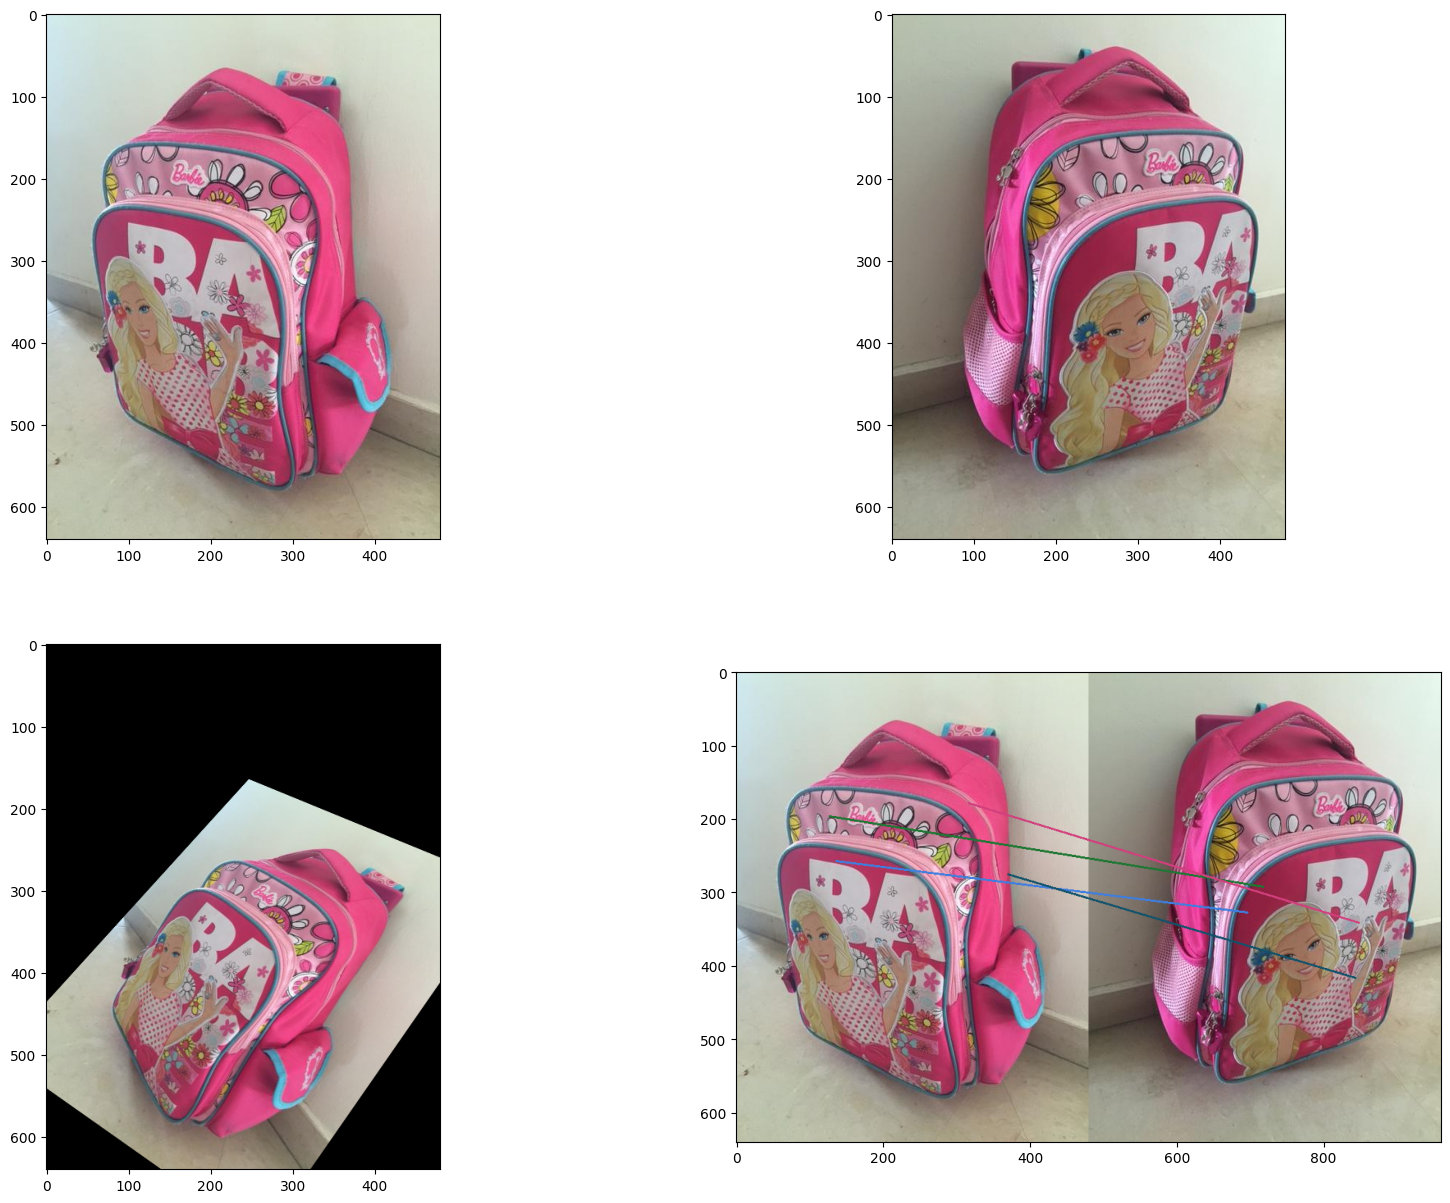

In [43]:
from random import randint

# Bemeneti kép beolvasása.
im_src = cv.imread('/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/im2.jpg', cv.IMREAD_COLOR)

# A forrás kép négy sarka.
pts_src = np.array([[136, 257], [370, 275], [127, 196],[316, 178]])

# Célnak szolgáló kép beolvasása.
im_dst = cv.imread('/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/im1.jpg', cv.IMREAD_COLOR)

# A célnak szolgáló kép négy sarka.
pts_dst = np.array([[216, 327],[364, 417],[238, 292],[369, 341]])

# Homográfia számítása a forrás és cél sarkok között.
h, status = cv.findHomography(pts_src, pts_dst)

# A forrás kép átmásolása a cél képre a homográfia alapján.
im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

# Homográfia által átalakított forrás sarkok koordinátáinak kiszámítása.
img_draw_matches = cv.hconcat([im_src, im_dst])
for i in range(len(pts_src)):
    pt1 = np.array([pts_src[i][0], pts_src[i][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(h, pt1)
    pt2 = pt2/pt2[2]
    end = (int(im_src.shape[1] + pt2[0]), int(pt2[1]))
    cv.line(img_draw_matches, tuple([int(j) for j in pts_src[i]]), end, (randint(0, 255), randint(0, 255), randint(0, 255)), 2)

# Képek megjelenítése
f,axs=plt.subplots(2,2,figsize=(20,15))
plt.subplot(221), plt.imshow(cv.cvtColor(im_src, cv.COLOR_BGR2RGB))
plt.subplot(222), plt.imshow(cv.cvtColor(im_dst, cv.COLOR_BGR2RGB))
plt.subplot(223), plt.imshow(cv.cvtColor(im_out, cv.COLOR_BGR2RGB))
plt.subplot(224), plt.imshow(cv.cvtColor(img_draw_matches, cv.COLOR_BGR2RGB))
plt.show()
